<a href="https://colab.research.google.com/github/sanchesprogramer/Inteligencia-Artificial/blob/main/An%C3%A1lise%20explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raphael Dias Sanches RA: 10403418

Felipe de Almeida Parreira RA: 10400771

In [38]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt

In [39]:
dataset = pd.read_csv("https://raw.githubusercontent.com/sanchesprogramer/Inteligencia-Artificial/refs/heads/main/Projeto/Base.csv", sep = ";")

In [40]:
dataset['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dataset['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].str.replace(",", ".", regex=True).astype(float)
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        try:
            dataset[col] = pd.to_datetime(dataset[col])
        except:
            pass

<ipython-input-40-649d75f60279>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset[col] = pd.to_datetime(dataset[col])


In [41]:
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
dataset.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)"
0,01/01/2024,0000 UTC,0.0,72.0,65.0,72.0
1,01/01/2024,0100 UTC,0.0,75.0,70.0,75.0
2,01/01/2024,0200 UTC,0.0,78.0,75.0,78.0
3,01/01/2024,0300 UTC,0.0,79.0,77.0,78.0
4,01/01/2024,0400 UTC,0.0,78.0,75.0,77.0


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8752 entries, 0 to 8751
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data                                      8752 non-null   object 
 1   Hora UTC                                  8752 non-null   object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)          8752 non-null   float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)  8752 non-null   float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)  8752 non-null   float64
 5   UMIDADE RELATIVA DO AR, HORARIA (%)       8752 non-null   float64
dtypes: float64(4), object(2)
memory usage: 410.4+ KB


In [43]:
dataset.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)"
count,8752.000000,8752.000000,8752.000000,8752.000000
mean,0.239717,80.724177,75.438071,78.122715
std,1.473817,13.487951,15.812857,14.787568
min,0.000000,33.000000,26.000000,28.000000
25%,0.000000,72.000000,64.000000,68.000000
50%,0.000000,84.000000,79.000000,82.000000
75%,0.000000,92.000000,89.000000,90.000000
max,46.800000,97.000000,97.000000,97.000000


In [44]:
dataset.isnull().sum()

,0
Data,0
Hora UTC,0
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),0
"UMIDADE RELATIVA DO AR, HORARIA (%)",0


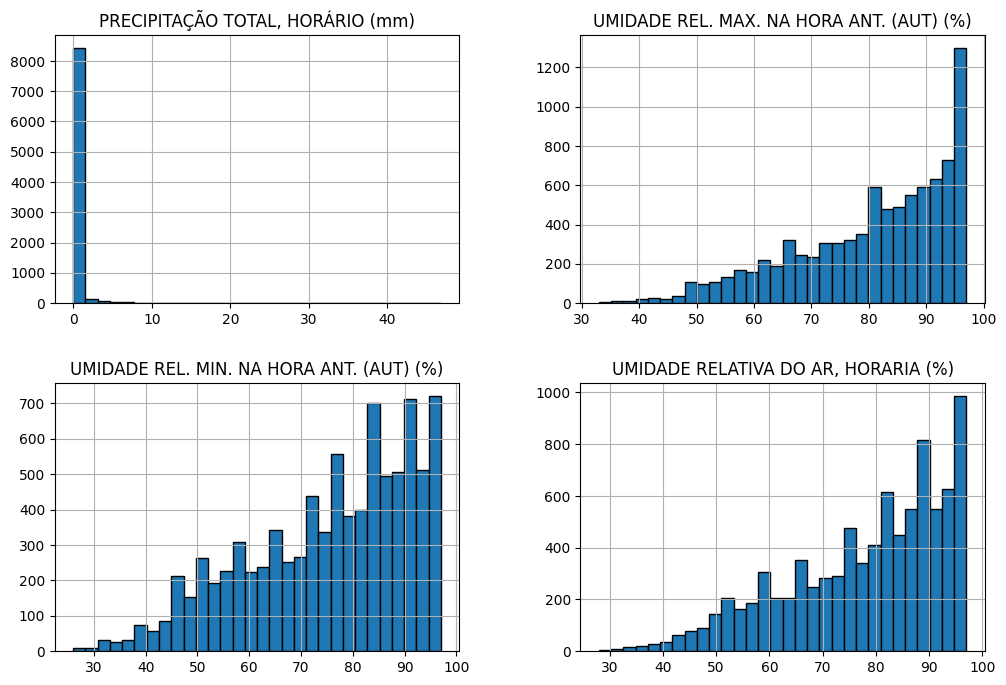

In [45]:
dataset.select_dtypes(include=['number']).hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.show()

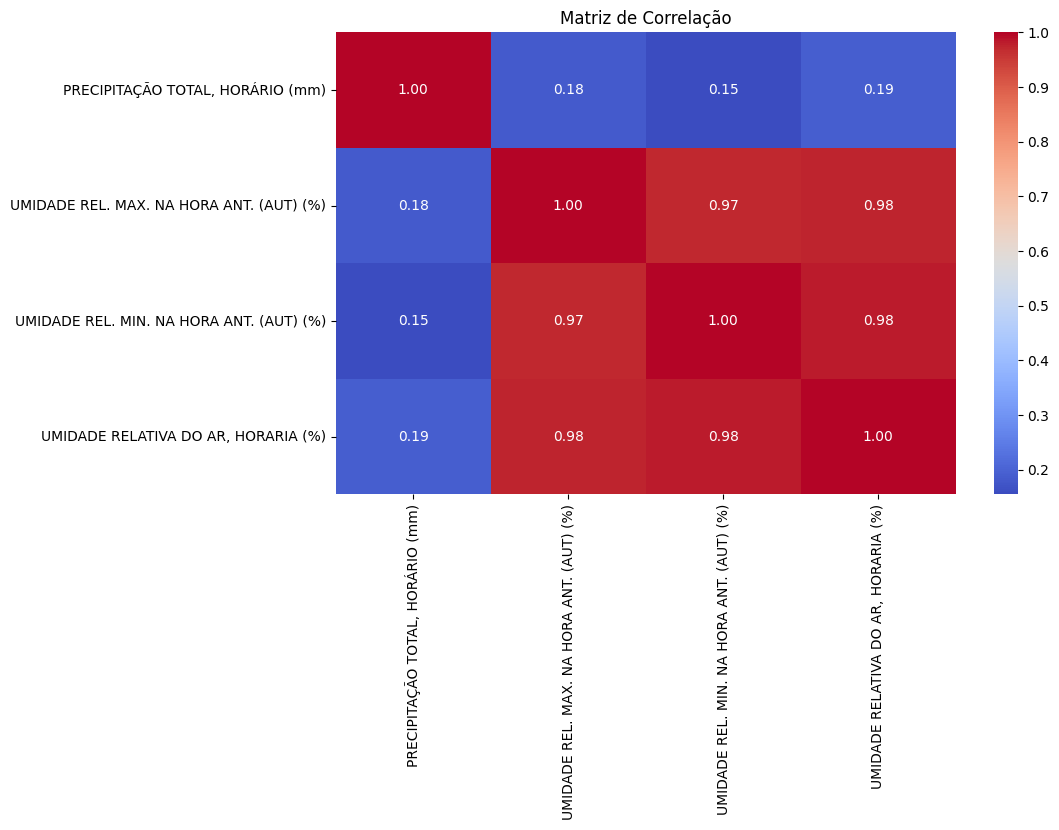

In [46]:
df_numerico = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numerico.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()